In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from linearRegression import LinearRegression

In [3]:
df = pd.read_csv('advertising.csv')
df = df.sample(frac=1, random_state=np.random.randint(0,100)).reset_index(drop=True)
display(df)

,TV,Radio,Newspaper,Sales
0,197.6,3.5,5.9,16.7
1,8.7,48.9,75.0,7.2
2,139.2,14.3,25.6,12.2
3,290.7,4.1,8.5,17.8
4,287.6,43.0,71.8,26.2
...,...,...,...,...
195,199.8,3.1,34.6,16.4
196,253.8,21.3,30.0,17.6
197,234.5,3.4,84.8,16.9
198,120.2,19.6,11.6,13.2


In [4]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [5]:
# print(X)
# print(y)

In [6]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std
# print(X_normalized)

y = np.array(y)

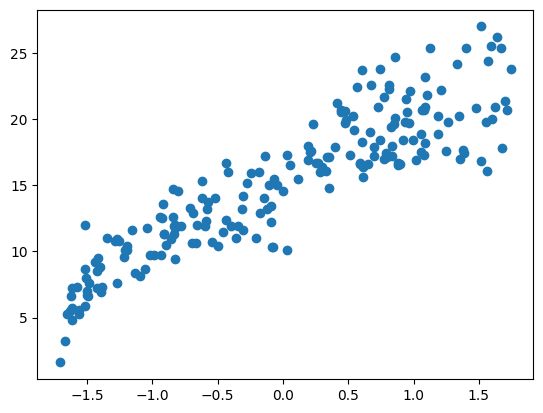

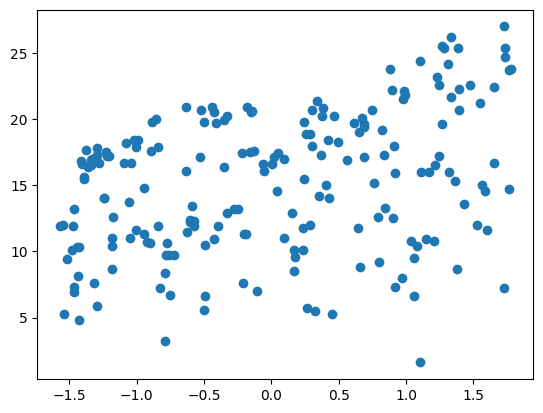

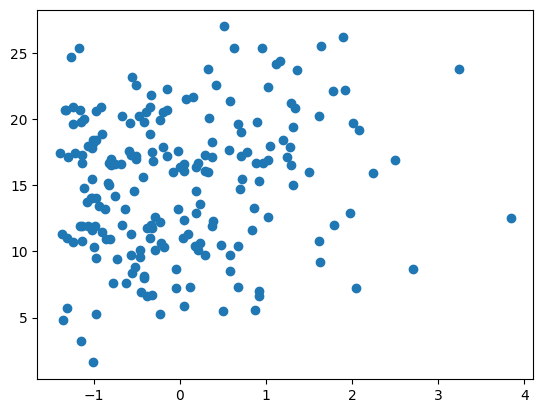

In [7]:
for i in range(3):
    plt.scatter(X_normalized[:, i],y)
    plt.show()

In [8]:
n_train = 150

X_train = X_normalized[0:n_train]
X_test = X_normalized[n_train:200]

y_train = y[0:n_train]
y_test = y[n_train:200]

In [9]:
iterations = 1000
lr = 0.1
model = LinearRegression(lr,iterations)
model.fit(X_train,y_train)
print(model.w, model.b)
y_predict = [model.predict(i) for i in X_test]

[4.69221704 1.52991178 0.05928355] 15.1838230742891


In [10]:
print(model.costs[-1])

3.1374191049574516


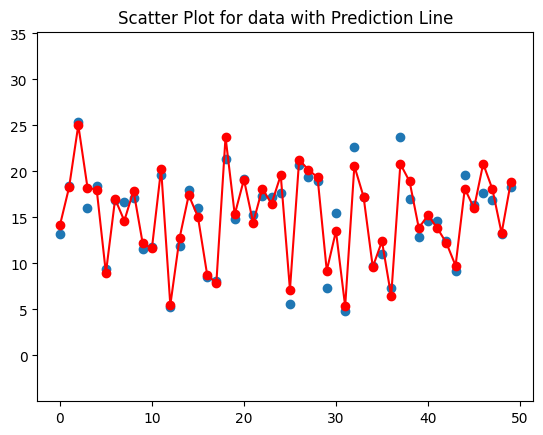

In [11]:
points = [i for i in range(len(y_test))]

plt.scatter(points, y_test, label='Actual Data')
plt.plot(points, y_predict, color='red', label='Predicted Line', marker='o')
plt.axis('equal')
plt.title('Scatter Plot for data with Prediction Line')
plt.show()

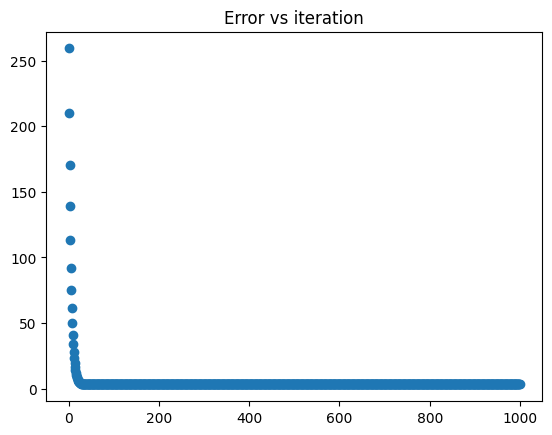

In [12]:
iterList = [i for i in range(len(model.costs))]
plt.scatter(iterList, model.costs, label='Actual Data')
plt.title('Error vs iteration')
plt.show()